In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

In [7]:
# reflect the tables
Base.prepare(engine,reflect=True)

In [8]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table Station
Station = Base.classes.station

In [10]:
# Save references to each table Measurement
Measurement = Base.classes.measurement

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent_date

('2017-08-23')

In [13]:
# Calculate the date one year from the last date in data set.
one_year_from_last_date = dt.date(2017,8,23) - dt.timedelta(days=365)
one_year_from_last_date

datetime.date(2016, 8, 23)

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Need to filter for just last 12 months, as data set has items going back to Jan 1, 2010
precipitation_date = session.query(Measurement.date,Measurement.prcp).\
    filter(Measurement.date >=one_year_from_last_date).\
    order_by(Measurement.date).all()
precipitation_date

[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [15]:
# Perform a query to retrieve the data and precipitation scores
# Need to call Cols B & C in hawaii_measurements.csv

data_and_precipitation_score = session.query(Measurement.date,Measurement.prcp).order_by(Measurement.date.desc()).all()
data_and_precipitation_score

[('2017-08-23', 0.0),
 ('2017-08-23', 0.0),
 ('2017-08-23', 0.08),
 ('2017-08-23', 0.45),
 ('2017-08-22', 0.0),
 ('2017-08-22', 0.0),
 ('2017-08-22', 0.5),
 ('2017-08-21', 0.0),
 ('2017-08-21', 0.02),
 ('2017-08-21', None),
 ('2017-08-21', 0.56),
 ('2017-08-20', 0.0),
 ('2017-08-20', 0.01),
 ('2017-08-20', None),
 ('2017-08-19', 0.0),
 ('2017-08-19', 0.0),
 ('2017-08-19', None),
 ('2017-08-19', 0.09),
 ('2017-08-18', 0.0),
 ('2017-08-18', 0.0),
 ('2017-08-18', 0.06),
 ('2017-08-18', None),
 ('2017-08-17', 0.0),
 ('2017-08-17', 0.05),
 ('2017-08-17', 0.01),
 ('2017-08-17', 0.13),
 ('2017-08-16', 0.0),
 ('2017-08-16', 0.07),
 ('2017-08-16', 0.12),
 ('2017-08-16', 0.42),
 ('2017-08-15', 0.02),
 ('2017-08-15', 0.0),
 ('2017-08-15', 0.06),
 ('2017-08-15', 0.32),
 ('2017-08-15', 0.42),
 ('2017-08-14', 0.0),
 ('2017-08-14', 0.01),
 ('2017-08-14', 0.08),
 ('2017-08-14', 0.0),
 ('2017-08-14', 0.22),
 ('2017-08-13', 0.0),
 ('2017-08-13', None),
 ('2017-08-13', 0.0),
 ('2017-08-13', 0.0),
 ('2017

In [16]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Need to reference precipitation_date
precipitation_dataframe = pd.DataFrame(precipitation_date, columns = ["date", "Precipitation"])


In [17]:
# Sort the dataframe by date
precipitation_dataframe.set_index("date", inplace=True,)
precipitation_dataframe


,Precipitation
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


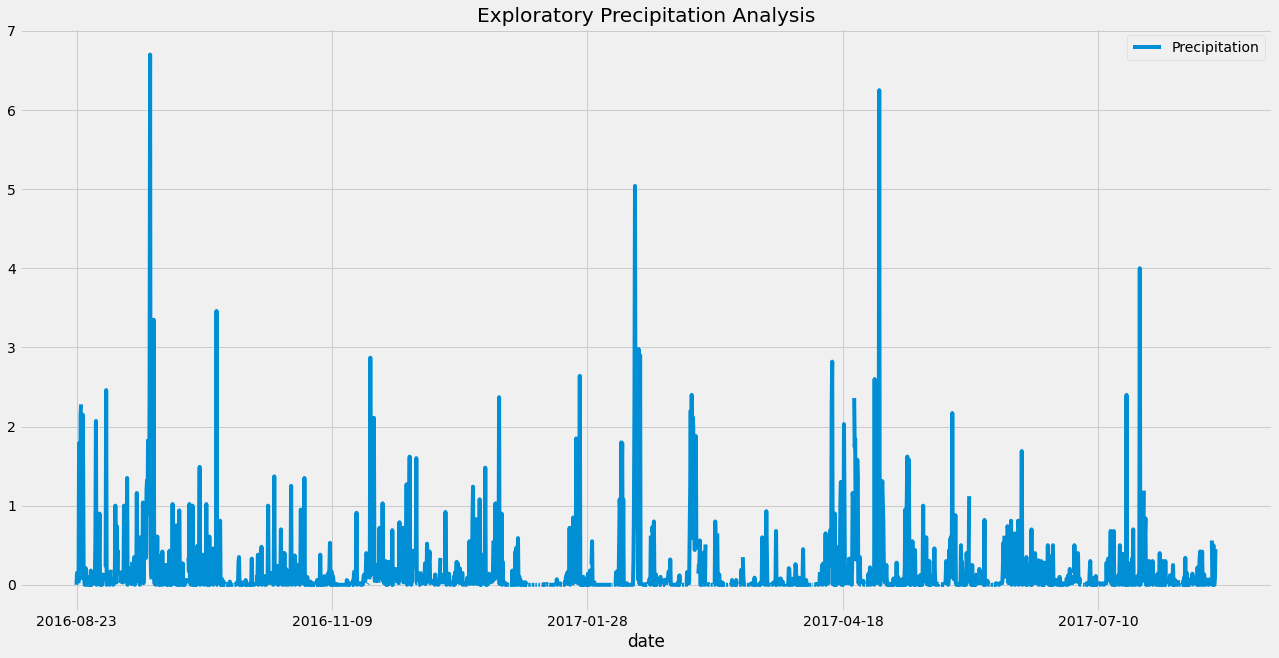

<Figure size 432x288 with 0 Axes>

In [18]:
# Use Pandas Plotting with Matplotlib to plot the data
precipitation_dataframe.plot(title="Exploratory Precipitation Analysis",figsize=(20,10))
plt.legend(loc="upper right")
plt.show()
plt.savefig("Exploratory Precipitation Analysis.png")

In [19]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_dataframe.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [20]:
# Design a query to calculate the total number stations in the dataset
# Unique stations 
total_number_stations = session.query(Measurement.station).distinct().count()
total_number_stations

9

In [21]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
most_active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
    

In [22]:
# List the stations and the counts in descending order.
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [23]:
# Using the most active station id from the previous query, calculate the lowest temperature.
sel = [func.min(Measurement.tobs)]
lowest_temperature = session.query(*sel).\
    filter(Measurement.station == "USC00519281").all()
lowest_temperature

[(54.0)]

In [24]:
# Using the most active station id from the previous query, calculate the highest temperature.
sel = [func.max(Measurement.tobs)]
highest_temperature = session.query(*sel).\
    filter(Measurement.station == "USC00519281").all()
highest_temperature

[(85.0)]

In [25]:
# Using the most active station id from the previous query, calculate the average temperature.
sel = [func.avg(Measurement.tobs)]
average_temperature = session.query(*sel).\
    filter(Measurement.station == "USC00519281").all()
average_temperature

[(71.66378066378067)]

In [26]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station 
# Station USC00519281

temperature_observation_data = session.query(Measurement.tobs).\
    filter(Measurement.date >=one_year_from_last_date).\
    order_by(Measurement.date).all()

In [27]:
# Use Pandas Plotting with Matplotlib to plot the data
temperature_observation_data = pd.DataFrame(temperature_observation_data, columns = ["TOBS"])

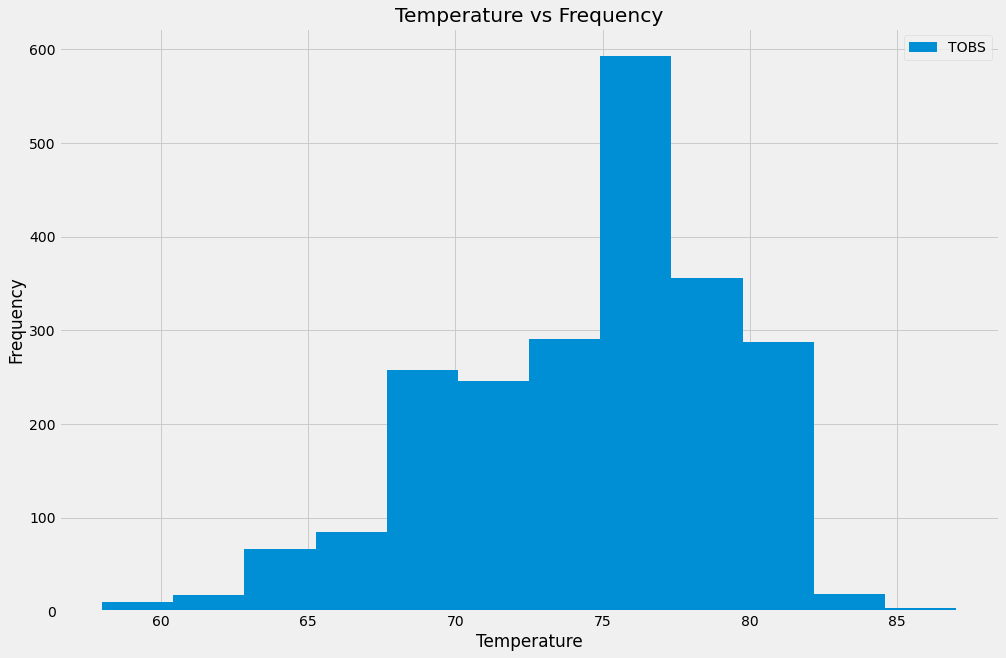

<Figure size 432x288 with 0 Axes>

In [28]:
# Plot the results as a histogram
temperature_observation_data.plot.hist(bins=12, title= "Temperature vs Frequency", figsize = (15,10))
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend(loc = "upper right")
plt.show()
plt.savefig("Temperature vs Frequency.png")

# Close session

In [ ]:
# Close Session
session.close()